In [65]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the dataset

df = pd.read_csv('data/pharma_spending_data.csv')

Visualization of the top 10 countries base on the selected factor.

The Calculation is based on average for PC_HEALTHXP, average for PC_GDP, average for USD_CAP, and sum of TOTAL_SPEND for each country.

In [44]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact


# Exclude specific countries
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']

# Filter data for years 2005 to 2015 based on 'TIME' as the year
filtered_data = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015) & (~df['LOCATION'].isin(excluded_countries))]

# Group by 'LOCATION' and calculate the mean for specific columns and sum for TOTAL_SPEND
aggregated_data = filtered_data.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
)

# Sort by USD_CAP to get the top 10 countries
top_10 = aggregated_data.sort_values(by='USD_CAP', ascending=False).head(10).reset_index()

# Function to plot dynamic graphs
def plot_top_10(column='USD_CAP'):
    fig = px.bar(
        top_10,
        x='LOCATION',
        y=column,
        title=f'Top 10 Countries by {column}',
        labels={'LOCATION': 'Country', column: column},
        text=column
    )
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(yaxis_title=column, xaxis_title='Country', showlegend=False)
    fig.show()

# Create an interactive widget for selecting columns
interact(plot_top_10, column=['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND'])


interactive(children=(Dropdown(description='column', index=2, options=('PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TO…

<function __main__.plot_top_10(column='USD_CAP')>

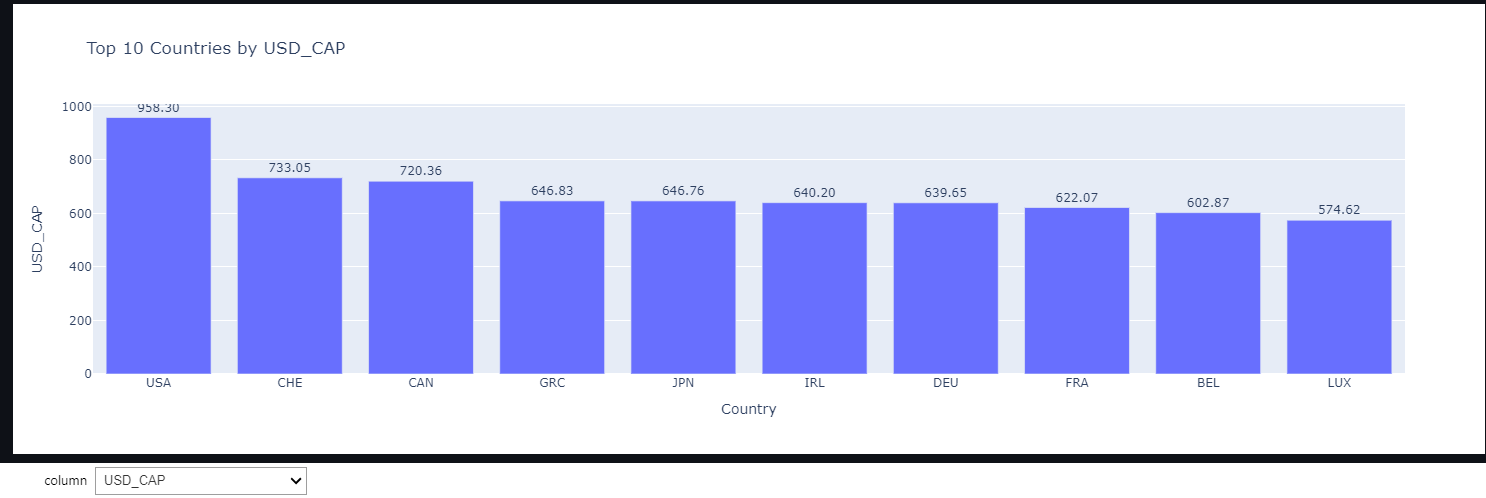

Visualization of the bottom 10 countries base on the selected factor.

The Calculation is based on average for PC_HEALTHXP, average for PC_GDP, average for USD_CAP, and sum of TOTAL_SPEND for each country.

In [49]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact


# Exclude specific countries
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']

# Filter data for years 2005 to 2015 based on 'TIME' as the year
filtered_data = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015) & (~df['LOCATION'].isin(excluded_countries))]

# Group by 'LOCATION' and calculate the mean for specific columns and sum for TOTAL_SPEND
aggregated_data = filtered_data.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
)

# Function to plot bottom 10 countries
def plot_bottom_10(column='USD_CAP'):
    # Sort by USD_CAP in ascending order to get the bottom 10 countries
    bottom_10 = aggregated_data.sort_values(by='USD_CAP', ascending=True).head(10).reset_index()
    
    fig = px.bar(
        bottom_10,
        x='LOCATION',
        y=column,
        title=f'Bottom 10 Countries by {column}',
        labels={'LOCATION': 'Country', column: column},
        text=column
    )
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(yaxis_title=column, xaxis_title='Country', showlegend=False)
    fig.show()

# Create an interactive widget for selecting columns for bottom 10
interact(plot_bottom_10, column=['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND'])

interactive(children=(Dropdown(description='column', index=2, options=('PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TO…

<function __main__.plot_bottom_10(column='USD_CAP')>

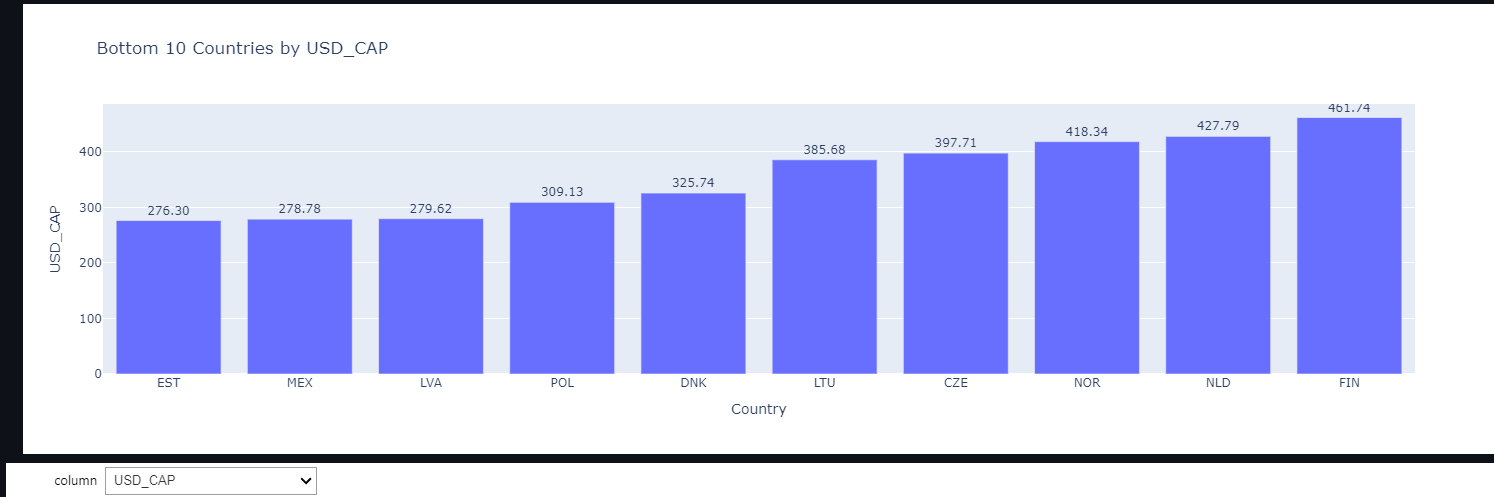

Dynamic visualization showing the trend for each of the top 10 and bottom 10 countries based on the selected feature.

So you can easily try to change between top 10 and bottom 10 by selecting the blue dot on top of the plot and from the drop down menu you can select the country and the feature you like to see the trend based on that feature.

In [66]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Exclude specific countries
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']

# Assuming 'TIME' is already numeric, filter data for years 2005 to 2015 and exclude specified countries
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2015) & (~df['LOCATION'].isin(excluded_countries))]

# Group by LOCATION and calculate the mean for relevant columns
aggregated_data = df_filtered.groupby('LOCATION').agg(
    PC_HEALTHXP=('PC_HEALTHXP', 'mean'),
    PC_GDP=('PC_GDP', 'mean'),
    USD_CAP=('USD_CAP', 'mean'),
    TOTAL_SPEND=('TOTAL_SPEND', 'sum')
).reset_index()

# Initialize Dash app
app = dash.Dash(__name__)

# Layout for the Dash app
app.layout = html.Div([
    html.H1("Dynamic Plot for Countries Analysis", style={'textAlign': 'center'}),

    # Radio buttons to select Top 10 or Bottom 10 countries
    html.Label("Select Range:"),
    dcc.RadioItems(
        id='range-selector',
        options=[
            {'label': 'Top 10', 'value': 'top'},
            {'label': 'Bottom 10', 'value': 'bottom'}
        ],
        value='top',  # default selection
        inline=True
    ),

    # Dropdown for selecting column to plot
    html.Label("Select Column to Plot:"),
    dcc.Dropdown(
        id='column-dropdown',
        options=[
            {'label': 'PC_HEALTHXP', 'value': 'PC_HEALTHXP'},
            {'label': 'PC_GDP', 'value': 'PC_GDP'},
            {'label': 'USD_CAP', 'value': 'USD_CAP'},
            {'label': 'TOTAL_SPEND', 'value': 'TOTAL_SPEND'}
        ],
        value='USD_CAP'  # default column
    ),

    # Dropdown for selecting country
    html.Label("Select Country:"),
    dcc.Dropdown(id='country-dropdown', value=None),

    # Graph to display the plot
    dcc.Graph(id='dynamic-plot')
])

# Callback to update the country dropdown based on the selected range (Top/Bottom 10)
@app.callback(
    Output('country-dropdown', 'options'),
    Output('country-dropdown', 'value'),
    Input('range-selector', 'value')
)
def update_country_dropdown(selected_range):
    # Sort data and get the relevant range
    if selected_range == 'top':
        filtered_countries = aggregated_data.sort_values(by='USD_CAP', ascending=False).head(10)
    else:
        filtered_countries = aggregated_data.sort_values(by='USD_CAP', ascending=True).head(10)

    # Update the country dropdown options and default value
    options = [{'label': country, 'value': country} for country in filtered_countries['LOCATION'].tolist()]
    value = options[0]['value'] if options else None
    return options, value

# Callback to update the plot based on selected country and column
@app.callback(
    Output('dynamic-plot', 'figure'),
    [Input('country-dropdown', 'value'),
     Input('column-dropdown', 'value')]
)
def update_plot(country, column):
    # Check if a valid country is selected
    if not country:
        return px.scatter(title="No data available")

    # Filter the data for the selected country
    country_data = df_filtered[df_filtered['LOCATION'] == country]

    # Create the plot for the selected column
    fig = px.line(
        country_data,
        x='TIME',
        y=column,
        title=f'{column} for {country} Over Time',
        markers=True
    )

    # Update layout for the plot
    fig.update_layout(
        xaxis_title="Year",
        yaxis_title=column,
        showlegend=False
    )
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, port=8060)  # Change port to 8060 (or any other available port)


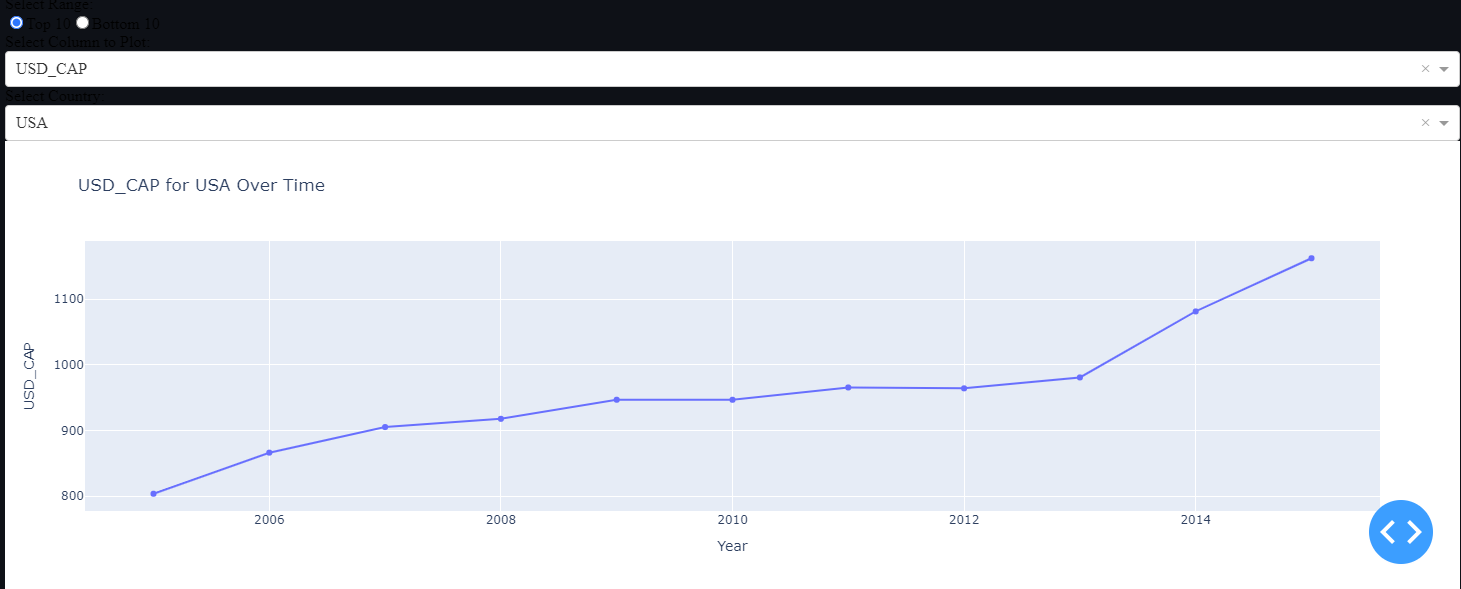

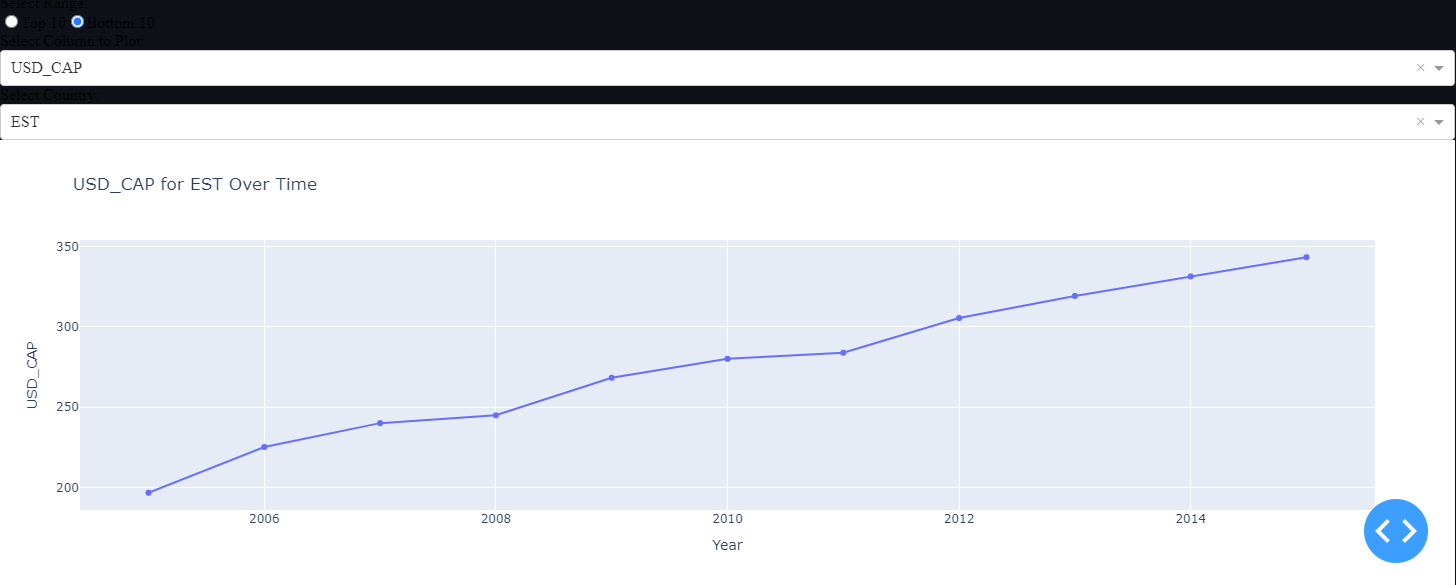

Forecasting based on Linear Regression and created a dynamic visualization

You can see the forecast for each country for 2016 and 2017 for the selected feature. All the selections are from a drop down menu.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from ipywidgets import interact

# Clean column names (remove leading/trailing spaces if any)
df.columns = df.columns.str.strip()

# Exclude specific countries
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
locations = df[~df['LOCATION'].isin(excluded_countries)]['LOCATION'].unique()

# Convert TIME to integer year if it's in datetime format
if np.issubdtype(df['TIME'].dtype, np.datetime64):
    df['TIME'] = df['TIME'].dt.year

# Dropdown for selecting the column (you can add more columns if needed)
columns = ['TOTAL_SPEND', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']

# Forecasting function for the selected location and column
def forecast_for_location(selected_location, selected_column):
    # Filter data for the selected location and time range (2005-2015)
    country_data = df[(df['LOCATION'] == selected_location) & (df['TIME'] >= 2005) & (df['TIME'] <= 2015)]
    
    # Features (X) are the years (TIME), target (y) is the selected column
    X = country_data[['TIME']]  # Independent variable (time)
    y = country_data[selected_column]  # Dependent variable (selected column)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for 2016 and 2017
    prediction_2016 = model.predict(np.array([[2016]]))  # Predict for 2016
    prediction_2017 = model.predict(np.array([[2017]]))  # Predict for 2017
    
    # Plotting the results
    plt.figure(figsize=(12, 6))
    
    # Plot the actual data points for the selected country
    plt.plot(country_data['TIME'], country_data[selected_column], label=f"{selected_location} (Actual)", marker='o', color='blue')
    
    # Plot the predictions for 2016 and 2017
    plt.scatter(2016, prediction_2016, color='red', label='Prediction 2016')
    plt.scatter(2017, prediction_2017, color='green', label='Prediction 2017')
    
    # Customize the plot
    plt.title(f'{selected_location} Forecast for {selected_column} (2005-2015)')
    plt.xlabel('Year')
    plt.ylabel(f'{selected_column} Value')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Create dropdown widgets for selecting country and column
location_dropdown = widgets.Dropdown(
    options=locations,
    description='Location:',
    value=locations[0]  # Default value
)

column_dropdown = widgets.Dropdown(
    options=columns,
    description='Column:',
    value='TOTAL_SPEND'  # Default value
)

# Use interact to link the dropdown selections to the forecasting and plotting function
interact(forecast_for_location, selected_location=location_dropdown, selected_column=column_dropdown)


interactive(children=(Dropdown(description='Location:', options=('AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FI…

<function __main__.forecast_for_location(selected_location, selected_column)>

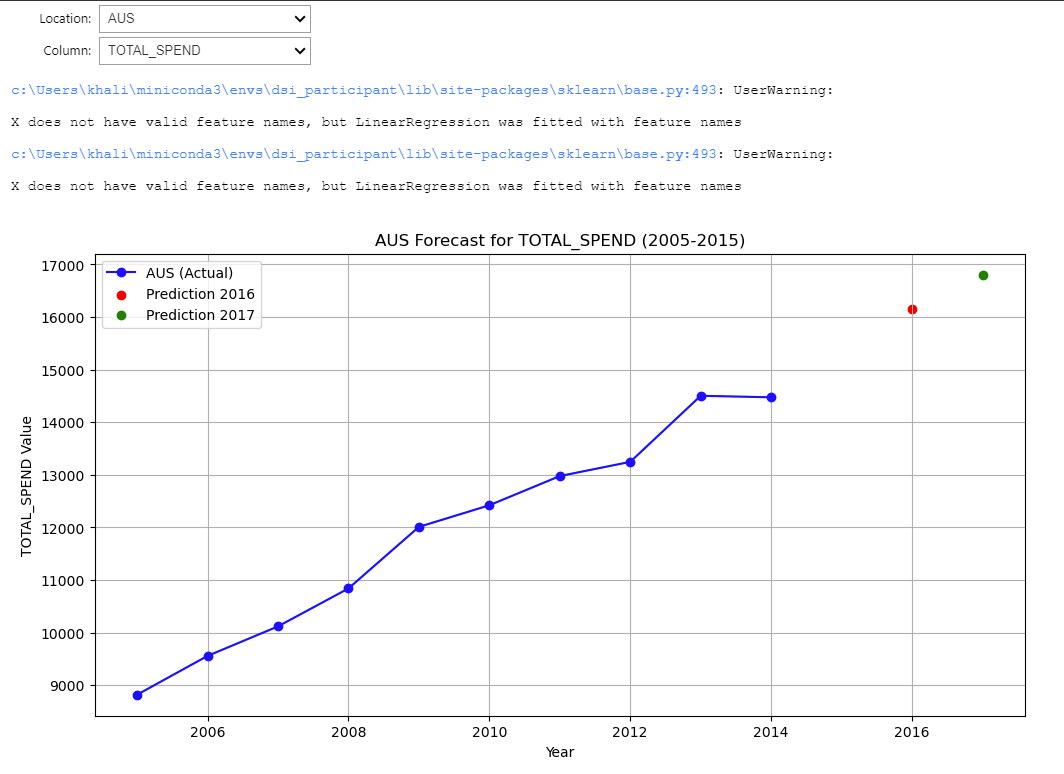

The method of prediction in the provided code uses Facebook Prophet, a powerful open-source forecasting tool designed for time series data. It is particularly effective when your data exhibits patterns like seasonality, trends, or irregular intervals.

How Prophet Works:

Prophet is based on an additive model where the time series data is decomposed into three main components:

Trend: Captures the overall increase or decrease in the data over time.

For example, steady growth in sales over years.
Prophet models this with either a linear or logistic growth curve.

Seasonality: Accounts for repeating patterns at regular intervals.

For example, spikes in ice cream sales during summer months.
Prophet detects and includes yearly, weekly, or custom seasonalities.

Holidays or Events (Optional): Allows for the inclusion of external factors that impact data temporarily.

For example, sales spikes during Black Friday or Christmas.
The model forecasts future values by extending the trend component while accounting for seasonality and any included events. Confidence intervals are calculated using Monte Carlo simulations to represent the uncertainty of predictions.

Why Prophet for This Task?

Automatic Seasonality Detection: Prophet automatically identifies yearly or weekly cycles in the data, which is useful when you have data like spending trends.

Handles Missing Data: Prophet can deal with missing or irregular data, which is common in real-world datasets.

Confidence Intervals: It provides predictions with uncertainty bounds (e.g., upper and lower confidence intervals), helping to assess the reliability of forecasts.

Ease of Use: Minimal configuration is required, making it accessible for quick forecasting.

In [ ]:
import dash
from dash import dcc, html, Input, Output
from prophet import Prophet
import pandas as pd
import plotly.graph_objects as go

# Remove unnecessary spaces from column names
df.columns = df.columns.str.strip()

# Ensure 'TIME' is in datetime format
df['TIME'] = pd.to_datetime(df['TIME'], format='%Y', errors='coerce')

# Filter out rows where 'TIME' couldn't be converted to datetime
df = df[df['TIME'].notna()]

# Exclude specific countries
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df = df[~df['LOCATION'].isin(excluded_countries)]

# Filter for years between 2005 and 2015
df = df[(df['TIME'].dt.year >= 2005) & (df['TIME'].dt.year <= 2015)]

# Get unique locations
locations = df['LOCATION'].unique()

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Dynamic Forecast Visualization"),
    html.Div([
        html.Label("Select Location:"),
        dcc.Dropdown(
            id='location-dropdown',
            options=[{'label': loc, 'value': loc} for loc in locations],
            value=locations[0],  # Default value
            clearable=False
        )
    ]),
    html.Div([
        html.Label("Select Column:"),
        dcc.Dropdown(
            id='column-dropdown',
            # Exclude 'LOCATION', 'TIME', and 'FLAG_CODES' from the dropdown options
            options=[{'label': col, 'value': col} for col in df.columns if col not in ['LOCATION', 'TIME', 'FLAG_CODES']],
            value=df.columns[2] if df.columns[2] not in ['LOCATION', 'TIME', 'FLAG_CODES'] else None,  # Default column
            clearable=False
        )
    ]),
    dcc.Graph(id='forecast-plot')
])

# Callback to update the plot based on dropdown selections
@app.callback(
    Output('forecast-plot', 'figure'),
    [Input('location-dropdown', 'value'),
     Input('column-dropdown', 'value')]
)
def update_forecast(location, column):
    # Filter data for the selected location and column
    country_data = df[df['LOCATION'] == location][['TIME', column]].rename(columns={'TIME': 'ds', column: 'y'})
       
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(country_data)
    
    # Create a future DataFrame for forecasting
    future = model.make_future_dataframe(periods=2, freq='Y')  # Forecast for 2016, 2017
    forecast = model.predict(future)
    
    # Extract predictions for 2016 and 2017
    forecast['year'] = forecast['ds'].dt.year
    predictions_2016_2017 = forecast[forecast['year'].isin([2016, 2017])].groupby('year').last()
    
    # Plot the forecast
    fig = go.Figure()
    
    # Add actual data
    fig.add_trace(go.Scatter(
        x=country_data['ds'],
        y=country_data['y'],
        mode='lines+markers',
        name=f"{location} (Actual)",
        line=dict(color='blue')
    ))
    
    # Add forecasted data
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat'],
        mode='lines',
        name="Forecast",
        line=dict(color='orange')
    ))
    
    # Highlight predictions for 2016 and 2017
    if not predictions_2016_2017.empty:
        fig.add_trace(go.Scatter(
            x=predictions_2016_2017['ds'],
            y=predictions_2016_2017['yhat'],
            mode='markers',
            marker=dict(color=['red', 'green'], size=10),
            name="Predicted (2016, 2017)"
        ))
    
    # Add confidence intervals
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat_upper'],
        mode='lines',
        line=dict(color='gray', dash='dot'),
        name="Upper Confidence Interval"
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat_lower'],
        mode='lines',
        line=dict(color='gray', dash='dot'),
        name="Lower Confidence Interval"
    ))
    
    # Layout updates
    fig.update_layout(
        title=f"Forecast for {location} ({column})",
        xaxis_title="Date",
        yaxis_title=column,
        legend_title="Legend"
    )
    
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, port=8080)


12:29:58 - cmdstanpy - INFO - Chain [1] start processing
12:29:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\khali\miniconda3\envs\dsi_participant\lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

12:30:05 - cmdstanpy - INFO - Chain [1] start processing
12:30:05 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\khali\miniconda3\envs\dsi_participant\lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

12:30:08 - cmdstanpy - INFO - Chain [1] start processing
12:30:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\khali\miniconda3\envs\dsi_participant\lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

12:30:15 - cmdstanpy - INFO - Chain [1] start processing
12:30:16 - cmdstanpy -

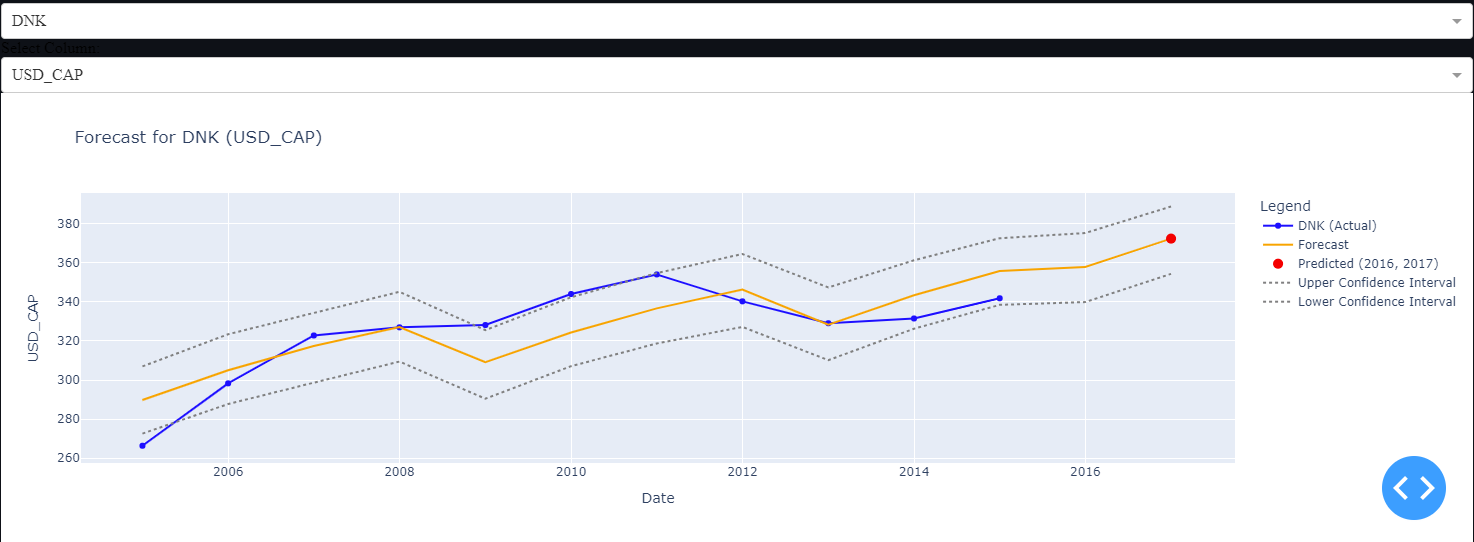